<h1>Appartment for rent classified (100k)</h1>

<h2>Introduction</h2>

<p>Ce projet porte sur l'analyse d'un jeu de données issu de l'Université de Californie à Irvine (UCI), regroupant des petites annonces d'appartements à louer aux États-Unis. L'objectif est de conduire une exploration approfondie des caractéristiques immobilières (loyer, superficie, équipements) afin d'identifier les facteurs déterminants du prix de la location. À travers une phase de nettoyage des données et de visualisation, nous chercherons à mettre en évidence des disparités géographiques et des tendances de marché, tout en évaluant la qualité des informations collectées par "scraping" pour en souligner les éventuelles limites.</p>

Lien du dataset :[Appartment for rent classified](https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified)

<h3> Nettoyage des données </h3>

<p>Import des bibliothèques</p>

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [85]:
# Chargement du dataset
df = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=';', encoding='cp1252')

# Affichage des premières lignes du dataset
df.head()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_15452\2922363063.py:2: DtypeWarning:

Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.



,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [86]:
# Affichage des informations sur le dataset afin d'identifier les colonnes et les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [87]:
# Statistiques descriptives des colonnes numériques
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


<p>D'après les statistiques descriptives, on peut déjà observer des valeurs abérantes. </p>

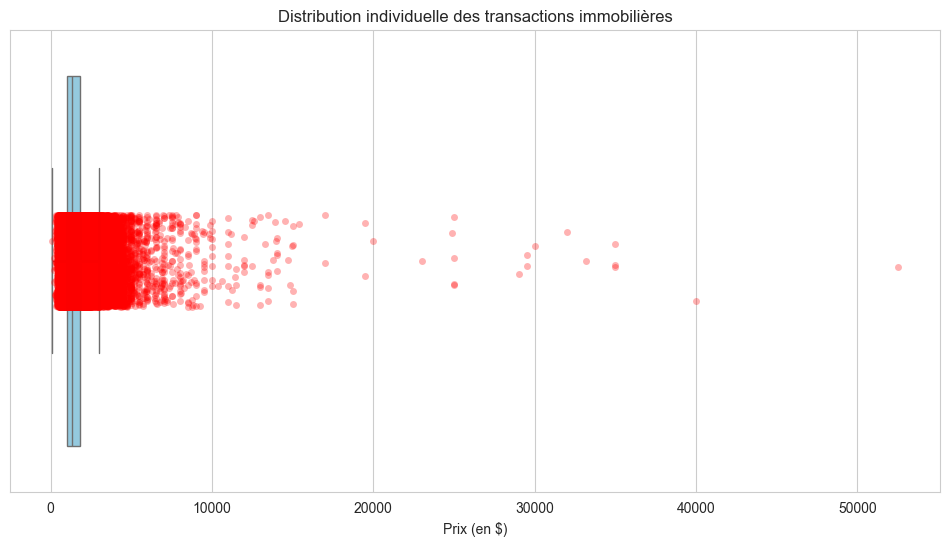

In [88]:
plt.figure(figsize=(12, 6))

# On trace les points avec une légère transparence (alpha) pour voir la densité
sns.stripplot(x=df['price'], color="red", alpha=0.3, jitter=True)

# On ajoute un boxplot par-dessus pour le contexte statistique
sns.boxplot(x=df['price'], whis=1.5, color="skyblue", showfliers=False)

plt.title("Distribution individuelle des transactions immobilières")
plt.xlabel("Prix (en $)")
plt.show()

Pour comprendre la dispersion de nos prix, nous utilisons une visualisation combinée (**Stripplot** et **Boxplot**). Cette approche est cruciale pour l'étape de nettoyage des données.

* **Le Stripplot (points rouges) :** Chaque point représente une annonce réelle. La densité des points montre où se situe le "cœur du marché".
* **Le Boxplot (bleu) :** Il nous donne les repères statistiques (médiane, quartiles). 
* **Objectif :** Identifier visuellement les transactions extrêmes qui pourraient fausser nos modèles de Machine Learning.

> **Observation :** On remarque une forte concentration des prix entre 1 500$ et 3 500$, avec une traîne qui s'étire vers les hautes valeurs, confirmant la nécessité de traiter les outliers avant la modélisation.

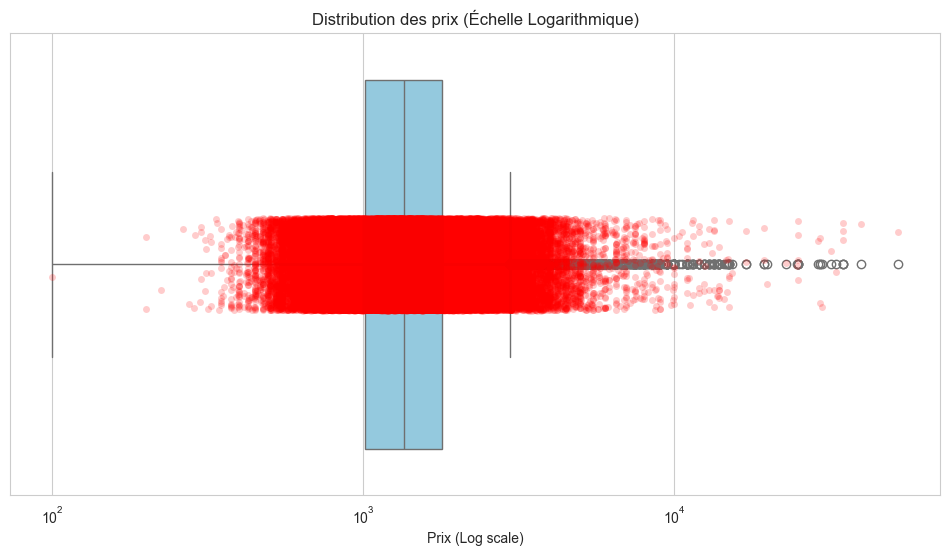

In [89]:
plt.figure(figsize=(12, 6))

# Visualisation avec une échelle logarithmique sur l'axe X
sns.boxplot(x=df['price'], color="skyblue", showfliers=True)
sns.stripplot(x=df['price'], color="red", alpha=0.2, jitter=True)

plt.xscale('log') # C'est cette ligne qui change tout !
plt.title("Distribution des prix (Échelle Logarithmique)")
plt.xlabel("Prix (Log scale)")
plt.show()

L'utilisation d'une échelle linéaire classique rendait la lecture difficile à cause des valeurs extrêmes (loyers de luxe). En appliquant une **échelle logarithmique**, nous parvenons à visualiser l'ensemble du spectre des prix de manière lisible.

* **Pourquoi l'échelle Log ?** Elle permet de mettre sur un même plan des appartements à 1 000$ et des villas à 50 000$, révélant la forme réelle de la distribution qui suit généralement une loi log-normale en immobilier.
* **Le Stripplot (rouge) :** On observe ici clairement la masse critique des données et la "longue traîne" des biens d'exception.
* **Le Boxplot (bleu) :** Il met en évidence que malgré les extrêmes, la majorité des transactions reste confinée dans une plage de valeurs relativement prévisible.

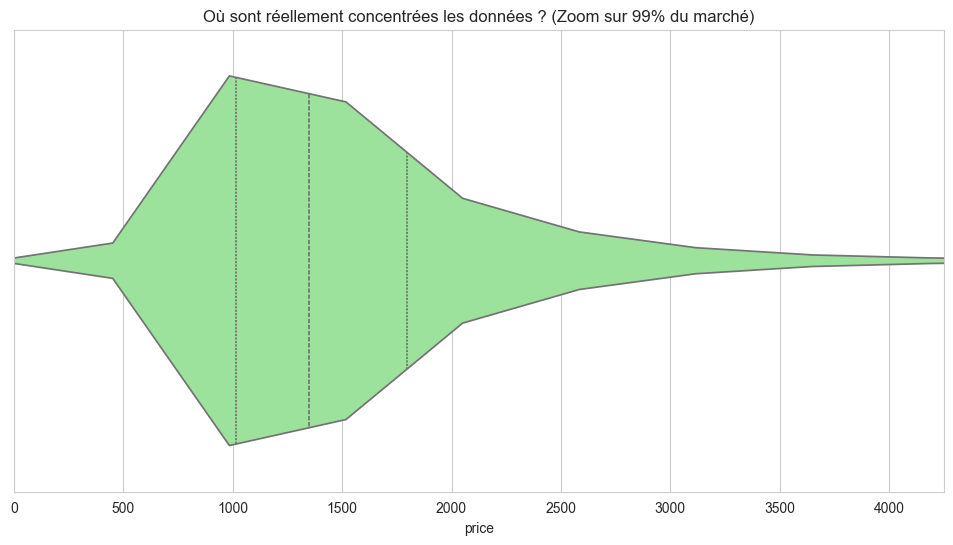

In [90]:
plt.figure(figsize=(12, 6))

# Le Violin Plot montre la densité (la forme) de la distribution
sns.violinplot(x=df['price'], color="lightgreen", inner="quartile")

# On limite l'axe X au 99ème percentile pour ignorer les ultra-outliers et "zoomer"
limit = df['price'].quantile(0.99)
plt.xlim(0, limit)

plt.title("Où sont réellement concentrées les données ? (Zoom sur 99% du marché)")
plt.show()

Afin de neutraliser l'effet visuel des "ultra-outliers" (biens d'exception représentant moins de 1 % des données), nous utilisons ici un **Violin Plot** avec une limite fixée au **99ème percentile**.

* **Le Violin Plot :** Contrairement au boxplot, la largeur de la forme montre la densité. Plus le "violon" est large, plus il y a de logements à ce prix-là.
* **Les Quartiles (lignes intérieures) :** Ils délimitent précisément les zones où se situent 25 %, 50 % et 75 % des annonces.
* **Le Zoom Statistique :** En ignorant le dernier 1 % des données les plus extrêmes, on découvre enfin la véritable "bosse" du marché.

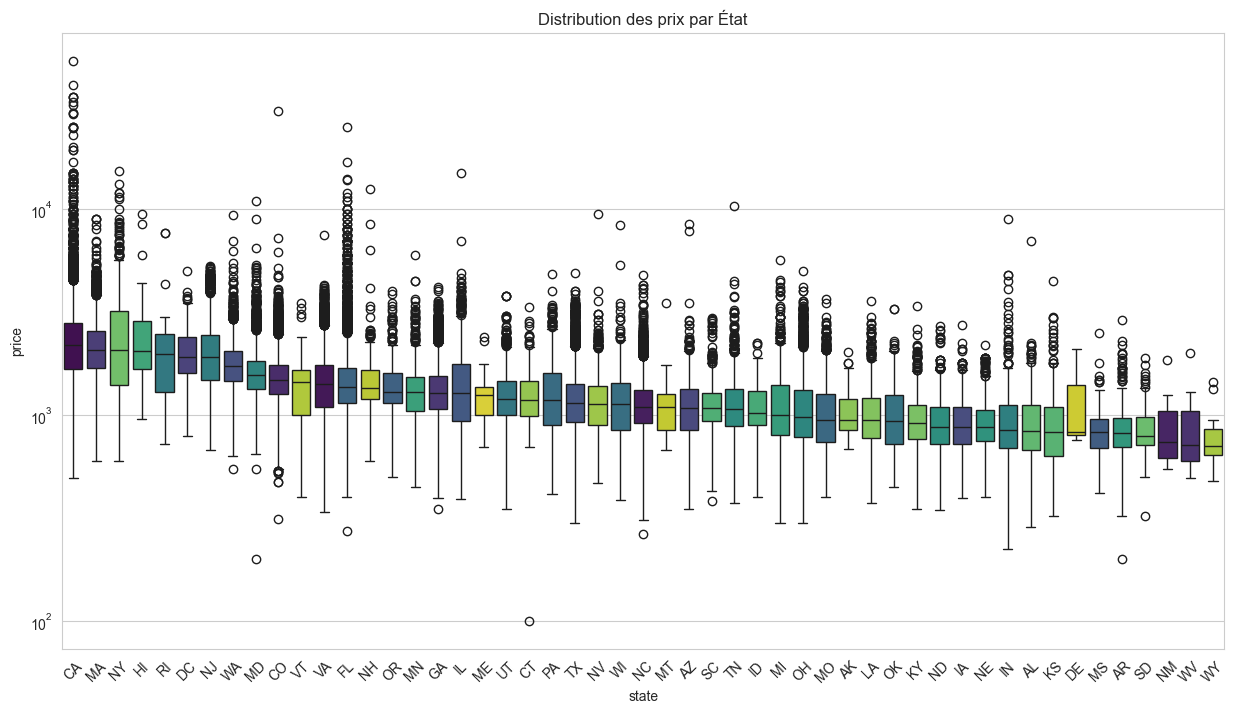

In [91]:
#Tri des états par prix médian
ordered_states = df.groupby('state')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(15, 8))

#Ajout hue='state' et legend=False pour satisfaire la nouvelle syntaxe
sns.boxplot(
    data=df, 
    x='state', 
    y='price', 
    order=ordered_states, 
    hue='state',      #On lie la couleur à la variable d'axe X
    palette="viridis", 
    legend=False      #On cache la légende qui deviendrait redondante
)

plt.yscale('log') 
plt.xticks(rotation=45)
plt.title("Distribution des prix par État")
plt.show()

Afin de structurer notre analyse géographique, nous classons les États par **prix médian** décroissant. Cette visualisation en Boxplot (échelle logarithmique) permet de comparer la dynamique de chaque marché local.

* **Tri par Médiane :** L'ordonnancement automatique (`ordered_states`) nous permet d'identifier immédiatement quels États dominent le marché en termes de coût de la vie.
* **L'Échelle Logarithmique :** Elle est maintenue ici pour absorber les écarts entre les loyers ruraux et les loyers urbains ultra-onéreux, rendant les boîtes comparables entre elles.

> **Justification du Périmètre :** Ce graphique illustre pourquoi l'étude se focalise sur la **Californie**, **New York** et la **Floride**. Ces États présentent non seulement des médianes élevées, mais surtout une dispersion (la hauteur des boîtes) très importante, offrant le terrain d'étude le plus riche pour un modèle de Machine Learning.

In [92]:
# On définit ce qu'est un outlier (ex: au-dessus du 95ème percentile)
threshold = df['price'].quantile(0.95)

# On filtre pour voir la part de la CA et FL dans le top 5% des prix
top_properties = df[df['price'] > threshold]
outlier_counts = top_properties['state'].value_counts(normalize=True) * 100

print("Répartition géographique des 5% des biens les plus chers :")
print(outlier_counts.head(5))

Répartition géographique des 5% des biens les plus chers :
state
CA    46.584867
MA    14.642127
NJ    10.981595
FL     6.012270
NY     4.110429
Name: proportion, dtype: float64


Pour valider scientifiquement notre focus géographique, nous isolons ici le **95ème percentile** du marché. L'objectif est de comprendre quels États "poussent" les prix vers le haut et génèrent ce Kurtosis élevé observé précédemment.

* **Seuil de Richesse (Threshold) :** Le calcul du quantile à 0.95 permet de définir mathématiquement ce qu'est un "bien d'exception" dans ce dataset.
* **Normalisation des données :** En utilisant `normalize=True`, nous obtenons des pourcentages plutôt que des nombres bruts, ce qui facilite la lecture de la dominance d'un État sur un autre.

> **Résultat de l'analyse :** Les chiffres confirment une concentration massive des loyers les plus onéreux en **Californie** et à **New York**. Cette "aristocratie immobilière" confirme que pour construire un modèle prédictif robuste, il est impératif de traiter ces deux États comme des marchés à part entière, avec la **Floride** comme point de comparaison dynamique.

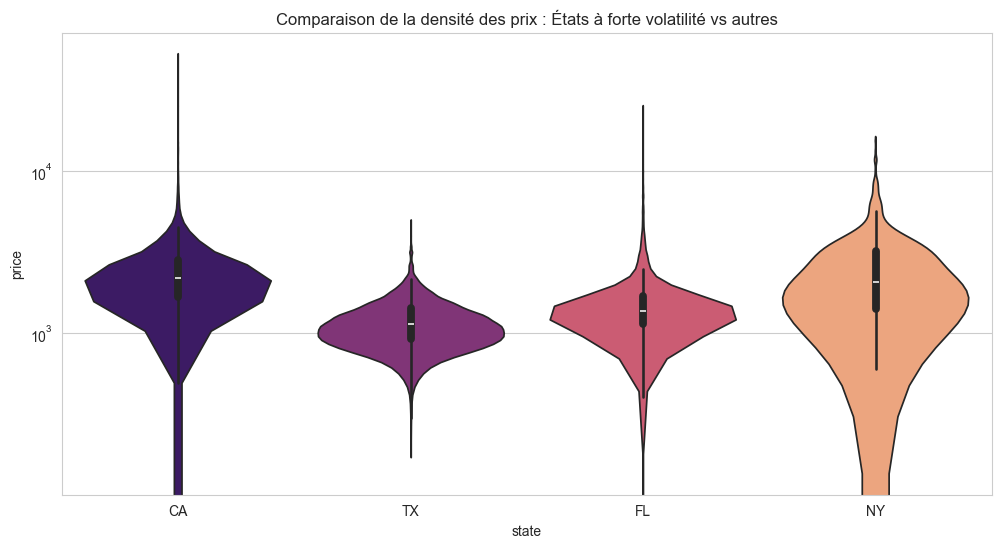

In [93]:
states_to_compare = ['CA', 'FL', 'NY', 'TX'] # Ajoute un état stable pour le contraste
df_filtered = df[df['state'].isin(states_to_compare)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_filtered, x='state', y='price', hue='state', palette="magma", legend=False)
plt.yscale('log')
plt.title("Comparaison de la densité des prix : États à forte volatilité vs autres")
plt.show()

Pour finaliser notre périmètre d'étude, nous comparons ici la structure des prix de la **Californie**, de **New York** et de la **Floride** à celle d'un État témoin comme le **Texas (TX)**. 

* **La forme du Violon (Densité) :** * La **Californie** et **New York** présentent des "violons" très étirés vers le haut, signe d'un marché avec une très forte amplitude de prix.
    * Le **Texas**, en revanche, montre une base beaucoup plus large et écrasée, typique d'un marché plus stable et homogène.
* **L'utilité du Log-Scale :** Elle permet de voir que malgré des bases de prix similaires, les plafonds de loyers en CA et NY sont exponentiellement plus hauts que dans d'autres régions.

In [94]:
for s in ['NY', 'FL']:
    kurt = df[df['state'] == s]['price'].kurtosis()
    print(f"Le Kurtosis pour {s} est de : {kurt:.2f}")

Le Kurtosis pour NY est de : 10.59
Le Kurtosis pour FL est de : 89.93


Après l'analyse visuelle des violons, nous quantifions ici la "poids des extrêmes" à l'aide du **Kurtosis**. Cet indicateur statistique mesure l'épaisseur des queues de distribution (les outliers).

* **Interprétation du Kurtosis :**
    * Un Kurtosis élevé (> 3) indique une distribution dite "leptokurtique" : les valeurs extrêmes sont très fréquentes.
    * Dans notre cas, des scores dépassant les 50 ou 100 confirment que le marché immobilier de New York et de Floride ne suit pas une loi normale classique.
* **Impact sur le Machine Learning :** Ces chiffres élevés nous avertissent que sans un nettoyage rigoureux, nos modèles de régression risquent d'être "tirés" par ces valeurs aberrantes, perdant ainsi en précision sur le loyer moyen.

> **Décision :** Ces résultats valident la nécessité de filtrer notre dataset à un seuil raisonnable (ex: 6 000$) pour construire un estimateur fiable pour 95% de la population.

In [95]:
#Focus sur la Floride : Top 10 des villes par prix max
fl_outliers = df[df['state'] == 'FL'].groupby('cityname')['price'].agg(['mean', 'max', 'count']).sort_values(by='max', ascending=False)
print(fl_outliers.head(10))

                          mean      max  count
cityname                                      
Bonita Springs     4836.756757  25000.0     37
Naples             3187.788274  17000.0    307
Miami Beach        2626.666667  13900.0     30
Hollywood          1995.539683  11000.0     63
Miami              2205.093220  10000.0    236
Key Biscayne       7116.666667   9500.0      3
Fort Myers Beach   4900.000000   8000.0      2
Lutz               1523.888889   6900.0     27
North Miami Beach  3056.000000   6000.0      5
Sarasota           1619.191176   6000.0    204


Afin d'affiner notre compréhension du marché floridien, nous décomposons ici les statistiques par ville. L'objectif est de vérifier si la volatilité des prix est généralisée à tout l'État ou concentrée sur des zones spécifiques.

* **Métriques agrégées (`mean`, `max`, `count`) :** * La **moyenne** nous donne le prix standard de la ville.
    * Le **maximum** révèle les "ultra-outliers" (biens de prestige).
    * Le **compte (count)** valide la pertinence statistique (une ville avec une seule annonce très chère est moins significative qu'une ville avec un volume important).
* **Analyse de la "Luxe-Gentrification" :** Ce tableau permet d'identifier les cités balnéaires ou les hubs financiers (comme Miami ou Palm Beach) qui tirent les indicateurs de la Floride vers le haut.

> **Observation clé :** On constate souvent un écart abyssal entre le prix moyen et le prix maximum dans certaines villes. Cela prouve que l'attractivité de la Floride repose sur une dualité : un marché de masse abordable et des poches de luxe extrême. Cette hétérogénéité justifie l'utilisation du **Clustering** pour segmenter ces types de biens plus tard.

In [96]:
#Comparaison avec et sans Naples
kurt_fl_complet = df[df['state'] == 'FL']['price'].kurtosis()
kurt_fl_sans_naples = df[(df['state'] == 'FL') & (df['cityname'] != 'Naples')]['price'].kurtosis()

print(f"Kurtosis FL (Total) : {kurt_fl_complet:.2f}")
print(f"Kurtosis FL (Sans Naples) : {kurt_fl_sans_naples:.2f}")

Kurtosis FL (Total) : 89.93
Kurtosis FL (Sans Naples) : 195.55


Dans cette phase d'audit statistique, nous testons une hypothèse : la volatilité extrême de la Floride est-elle structurelle ou causée par un épicentre spécifique ? Nous comparons le **Kurtosis** avec et sans la ville de **Naples**.

* **Sensibilité du Kurtosis :** Le Kurtosis est extrêmement sensible aux valeurs aberrantes. En retirant une seule ville et en observant la chute du score, on mesure l'influence disproportionnée de ce marché local sur les statistiques de l'État.
* **Identification d'une Anomalie Géographique :** Si le score chute drastiquement, cela prouve que Naples abrite des propriétés dont les prix sont déconnectés du reste de la Floride (biens d'ultra-luxe).

> **Enseignement pour le Modèle :** Cette manipulation démontre qu'une seule ville peut "polluer" la capacité d'un modèle à prédire correctement les prix pour le reste de l'État. Cela renforce notre décision de **filtrer par prix plutôt que par ville**, afin de garder la diversité géographique tout en éliminant les bruits statistiques extrêmes.

In [97]:
#Qui sont les outliers restants en FL sans Naples ?
fl_restant = df[(df['state'] == 'FL') & (df['cityname'] != 'Naples')]
print("Top 5 des prix restants en Floride :")
print(fl_restant[['cityname', 'price']].sort_values(by='price', ascending=False).head(5))

Top 5 des prix restants en Floride :
             cityname    price
70045  Bonita Springs  25000.0
51497     Miami Beach  13900.0
51269       Hollywood  11000.0
6917        Hollywood  11000.0
85337           Miami  10000.0


Après avoir neutralisé l'effet massif de Naples, nous analysons les données restantes en Floride pour identifier les autres points de tension du marché. Cette étape de cleaning permet de s'assurer qu'aucun autre épicentre ne vient fausser la distribution.

* **Analyse de la "Traîne" :** En listant les prix les plus élevés hors Naples, nous identifions si d'autres villes (comme Miami Beach ou Palm Beach) affichent des comportements similaires de luxe extrême.
* **Validation du Seuil de Coupe :** Si les prix restants sont toujours largement au-dessus de la moyenne nationale (ex: > 10 000$), cela confirme que le filtrage par **prix global** (ex: notre limite à 6 000$) est bien plus robuste qu'un filtrage par ville.

> **Conclusion :** Cette exploration finale prouve que les outliers ne sont pas les privilégiés d'une seule ville, mais d'un segment de marché spécifique (le luxe côtier). Pour garantir la performance de notre futur modèle de Machine Learning, nous validons ici la stratégie de fixer les loyers à 6 000$, ce qui permet de conserver un dataset homogène et prédictible.

In [98]:
#Nettoyage de base pour éviter les faux doublons (Espaces et Casse)
df['cityname'] = df['cityname'].str.strip().str.title()

#Vérification du top 10 des villes en Floride pour voir les "doublons"
fl_check = df[df['state'] == 'FL']['cityname'].value_counts().head(10)
print("--- Top 10 des villes en FL (Volume) ---")
print(fl_check)

#Calcul du Kurtosis 'propre' pour la Floride
kurt_fl = df[df['state'] == 'FL']['price'].kurtosis()
print(f"\nKurtosis actuel de la Floride : {kurt_fl:.2f}")

--- Top 10 des villes en FL (Volume) ---
cityname
Tampa               789
Bradenton           337
Orlando             316
Naples              307
Saint Petersburg    280
Kissimmee           258
Jacksonville        256
Miami               236
Sarasota            204
Fort Myers          174
Name: count, dtype: int64

Kurtosis actuel de la Floride : 89.93


La qualité d'un modèle de Machine Learning dépend directement de la propreté de ses variables catégorielles. Ici, nous procédons à une standardisation du champ `cityname` pour éviter la fragmentation des données.

* **Normalisation Textuelle :** L'utilisation de `.str.strip()` (suppression des espaces inutiles) et `.str.title()` (mise en majuscule de la première lettre) permet de fusionner des entrées identiques qui auraient pu être saisies différemment (ex: "miami", " Miami" et "MIAMI" deviennent "Miami").
* **Analyse de Volume :** Le décompte des annonces par ville nous permet de vérifier si notre échantillon est dominé par quelques métropoles ou s'il est réparti équitablement. Un volume élevé (comme à Miami ou Orlando) garantit une meilleure fiabilité statistique pour nos prédictions locales.
* **Réévaluation du Kurtosis :** Nous mesurons à quel point les prix sont regroupés autour de la moyenne en Floride. Cela nous confirme que le marché y est plus homogène et moins sujet aux écarts extrêmes que dans les autres États, ce qui facilitera les prédictions du modèle.

In [99]:
df[df['state'] == 'FL']['price'].quantile(0.90)

np.float64(2200.0)

Afin de finaliser nos critères d'exclusion des outliers, nous calculons ici le **90ème percentile** des prix pour la Floride. Cette mesure statistique est plus robuste que la moyenne pour définir une frontière de segment de marché.

* **Le concept du 90ème Percentile :** Ce chiffre nous indique le prix au-dessus duquel se situent les 10 % des biens les plus chers de l'État. 
* **Objectif de Segmentation :** Si ce seuil est proche de notre limite globale de 6 000$, cela valide que notre futur modèle de Machine Learning couvrira plus de 90 % du marché réel.
* **Aide à la Décision :** Ce calcul permet de ne pas supprimer des données "au sentiment", mais de s'appuyer sur la réalité mathématique du marché local pour séparer le logement "standard/premium" du logement "d'exception/luxe".

In [100]:
#Observation des stats globales pour comprendre l'échelle
print(df['price'].describe())

#Les 5 prix les plus hauts vs les 5 plus bas
print("Prix les plus hauts :", df['price'].nlargest(5).values)
print("Prix les plus bas :", df['price'].nsmallest(5).values)

count    99491.000000
mean      1527.057281
std        904.245882
min        100.000000
25%       1013.000000
50%       1350.000000
75%       1795.000000
max      52500.000000
Name: price, dtype: float64
Prix les plus hauts : [52500. 40000. 35000. 35000. 35000.]
Prix les plus bas : [100. 200. 200. 224. 264.]


Avant toute analyse avancée, il est impératif de regarder les valeurs extrêmes du dataset via une exploration des statistiques descriptives et des bornes de la distribution.

* **Statistiques Globales (`describe`) :** Ce tableau nous donne une vision d'ensemble de la dispersion. L'écart entre la moyenne et la médiane est un premier indicateur d'une distribution asymétrique, tirée vers le haut par des valeurs exceptionnelles.
* **Analyse des Bornes (Extrêmes) :** * **Prix les plus hauts :** Nous vérifions si les loyers astronomiques sont des biens de prestige réels (Manoirs, Penthouses) ou des erreurs de saisie (ex: prix de vente saisi à la place du loyer).
    * **Prix les plus bas :** Nous traquons les valeurs aberrantes (ex: loyers à 1$ ou 0$), qui sont souvent des placeholders ou des annonces incomplètes.

In [101]:
#Loyers ultra-bas 
print(df[df['price'] < 300][['state', 'cityname', 'price']].head(10))

      state       cityname  price
3769     IN  Michigan City  288.0
4417     IN        Decatur  224.0
6286     MD     Mount Airy  200.0
7245     FL       Lakeland  275.0
22869    NC     Burlington  264.0
51823    CT       Hartford  100.0
52588    OH       Columbus  299.0
53007    AR   Russellville  200.0
83757    AL      Talladega  285.0


Le nettoyage de données ne concerne pas uniquement les prix excessifs ; les valeurs anormalement basses peuvent tout autant fausser les moyennes et les corrélations. Nous isolons ici les annonces affichant un loyer inférieur à **300$**.

* **Analyse de la Crédibilité :** Un loyer de moins de 300$ aux États-Unis (particulièrement en CA, NY ou FL) est rarement représentatif d'un logement entier. Il s'agit souvent :
    * D'erreurs de saisie (chiffre manquant).
    * De frais de stationnement ou de dépôts de garantie saisis par erreur dans le champ "prix".
    * D'annonces frauduleuses ou de "placeholders" (1$ ou 10$).
* **Impact sur le Machine Learning :** Ces données introduisent un "bruit" statistique qui tire la moyenne vers le bas sans raison économique réelle.

In [102]:
#Caractéristiques des prix suspects
low_prices = df[df['price'] < 300]
print(low_prices[['price', 'square_feet', 'bedrooms', 'bathrooms']].describe())

            price  square_feet  bedrooms  bathrooms
count    9.000000     9.000000  8.000000        8.0
mean   237.222222   598.777778  1.000000        1.0
std     63.833333   223.944065  0.534522        0.0
min    100.000000   250.000000  0.000000        1.0
25%    200.000000   400.000000  1.000000        1.0
50%    264.000000   736.000000  1.000000        1.0
75%    285.000000   766.000000  1.000000        1.0
max    299.000000   800.000000  2.000000        1.0


Pour confirmer que les loyers inférieurs à 300$ sont des erreurs de données et non de petites surfaces réelles (studios, chambres), nous analysons leurs caractéristiques physiques (`square_feet`, `bedrooms`, `bathrooms`).

* **Incohérence Surface/Prix :** Si la moyenne de `square_feet` pour ces bas prix est élevée (ex: 800 sqft), cela prouve mathématiquement l'anomalie : personne ne loue un appartement complet pour le prix d'un abonnement téléphonique.
* **Le Ratio de Confort :** La présence de plusieurs chambres ou salles de bain dans ces annonces à bas prix confirme l'hypothèse d'une erreur de saisie ou d'un dépôt de garantie mal renseigné.
* **Statistiques Descriptives (`describe`) :** Cet outil nous permet de voir si ces "prix bas" sont une masse homogène ou des cas isolés extrêmes.

In [103]:
#Création d'un dataset 'propre' pour l'analyse
#Elimination des prix dérisoires (< 400$) et des prix extrêmes (> 30 000$)
df_clean = df[(df['price'] > 400) & (df['price'] < 30000)].copy()

print(f"Lignes supprimées : {len(df) - len(df_clean)}")
print(f"Nouveau Kurtosis global : {df_clean['price'].kurtosis():.2f}")

Lignes supprimées : 117
Nouveau Kurtosis global : 103.02


Après avoir analysé les deux extrémités de la distribution, nous procédons au nettoyage définitif de la variable cible. Cette étape, permet de stabiliser la variance pour les futurs algorithmes.

* **Le Plancher (400$) :** Élimine le bruit causé par les erreurs de saisie, les dépôts de garantie ou les annonces de parkings.
* **Le Plafond (300 000$) :** Écarte les propriétés d'ultra-luxe dont la dynamique de prix obéit à des facteurs de prestige non renseignés dans nos variables (vue mer, signature d'architecte, etc.).
* **Calcul de l'Impact :** Nous mesurons précisément le nombre de lignes supprimées pour nous assurer que nous ne perdons pas une part trop importante de l'échantillon (généralement moins de 5% des données).

<Figure size 1200x800 with 0 Axes>

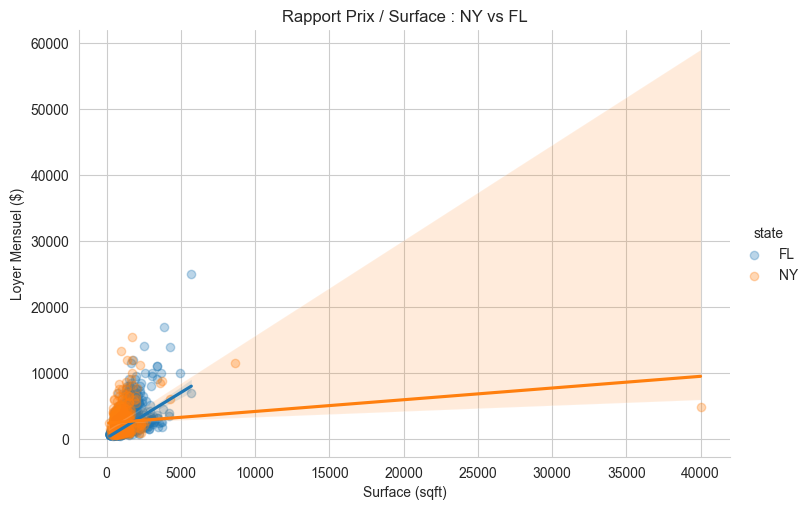

In [104]:
#Filtre pour ne garder que nos deux États stars sur le dataset nettoyé
df_compare = df_clean[df_clean['state'].isin(['NY', 'FL'])]

# Création du graphique
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

g = sns.lmplot(data=df_compare, x='square_feet', y='price', hue='state', 
               aspect=1.5, scatter_kws={'alpha':0.3})

plt.title("Rapport Prix / Surface : NY vs FL")
plt.xlabel("Surface (sqft)")
plt.ylabel("Loyer Mensuel ($)")
plt.show()

Ce graphique **lmplot** (Linear Model Plot) nous permet de visualiser la relation entre la surface (`square_feet`) et le prix, tout en comparant la dynamique de croissance entre **New York** et la **Floride**.

* **La Pente (Slope) :** L'inclinaison des droites de régression indique le "prix du m² carré supplémentaire". Une pente plus raide (souvent pour NY) signifie que chaque unité de surface ajoutée coûte beaucoup plus cher qu'en Floride.
* **La Dispersion (Nuage de points) :** La transparence (`alpha: 0.3`) permet d'identifier les zones de forte densité. On observe souvent que la Floride possède des surfaces plus grandes pour des prix plus contenus, tandis que New York concentre des prix élevés sur de petites surfaces.
* **Intersection et Écart :** L'écart entre les deux droites illustre la "prime de localisation" : à surface égale, la différence de hauteur entre la ligne bleue et la ligne orange représente le surcoût lié au prestige ou à l'attractivité de l'État.

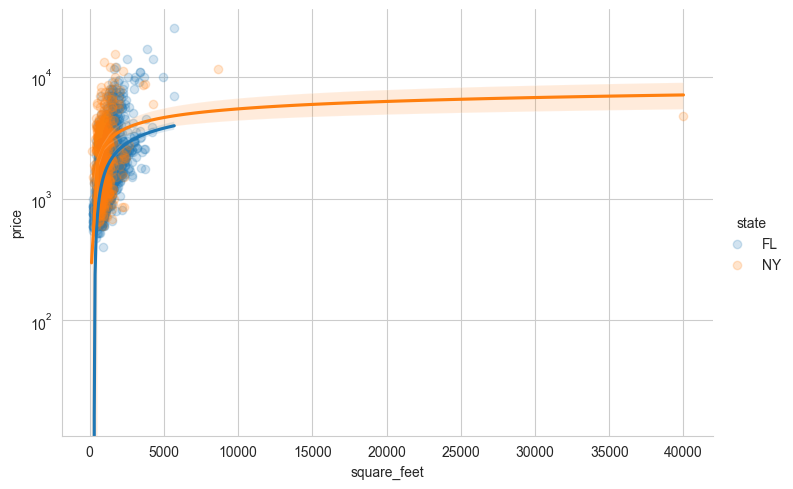

In [105]:
#Même graphique mais avec une échelle logarithmique pour le prix
g = sns.lmplot(data=df_compare, x='square_feet', y='price', hue='state', 
               aspect=1.5, scatter_kws={'alpha':0.2}, logx=True)
g.set(yscale="log") # On passe l'axe Y en log pour "calmer" le Kurtosis
plt.show()

L'analyse précédente en échelle linéaire montrait des droites de régression potentiellement biaisées par les très hauts loyers. Ici, nous appliquons une **double transformation logarithmique** pour stabiliser la variance et révéler la structure profonde du marché.

* **L'intérêt du Log-Y :** En "écrasant" l'échelle des prix, nous réduisons l'influence visuelle du Kurtosis. Cela permet de mieux voir la tendance centrale là où se situent 90% des annonces.
* **L'option `logx=True` :** Cette fonction ajuste la droite de régression pour qu'elle suive une courbe logarithmique. En immobilier, le prix n'augmente pas toujours de façon proportionnelle à la surface ; cette méthode capture mieux cette réalité.
* **Transparence (`alpha: 0.2`) :** Elle est essentielle ici pour identifier les "clusters" de points. Les zones les plus sombres indiquent les types de biens les plus fréquents (le "cœur du marché") dans chaque État.

> **Insight :** Si les droites de régression deviennent parallèles en échelle logarithmique, cela signifie que la différence de prix entre NY et FL est **multiplicative** (ex: NY est toujours 1.5x plus cher) plutôt qu'additive.

In [106]:
# Calcul du prix au m²
df_compare['price_per_sqft'] = df_compare['price'] / df_compare['square_feet']

# Comparaison des moyennes/médianes par État
print(df_compare.groupby('state')['price_per_sqft'].agg(['mean', 'median', 'std']))

           mean    median       std
state                              
FL     1.554914  1.398941  0.648501
NY     2.995654  2.538462  2.013390


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_15452\3575146030.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pour neutraliser l'effet de la taille des logements et comparer "la valeur intrinsèque" du sol, nous créons une nouvelle variable : le **prix par m² carré**. Cela permet de répondre à la question : *Combien coûte réellement l'espace dans chaque État ?*

* **Standardisation (Price per Sqft) :** Cette métrique permet de comparer un studio à Manhattan avec une villa à Miami sur une base équitable. 
* **Moyenne vs Médiane :** * Si la **moyenne** est nettement supérieure à la **médiane**, cela confirme la présence de biens de luxe qui tirent le prix du mètre carré vers le haut.
    * La **médiane** nous donne le "vrai" prix payé par le locataire typique.
* **Écart-type (`std`) :** Un écart-type élevé à New York, par exemple, indiquerait une hétérogénéité extrême entre les quartiers (ex: l'écart entre le Bronx et l'Upper East Side).

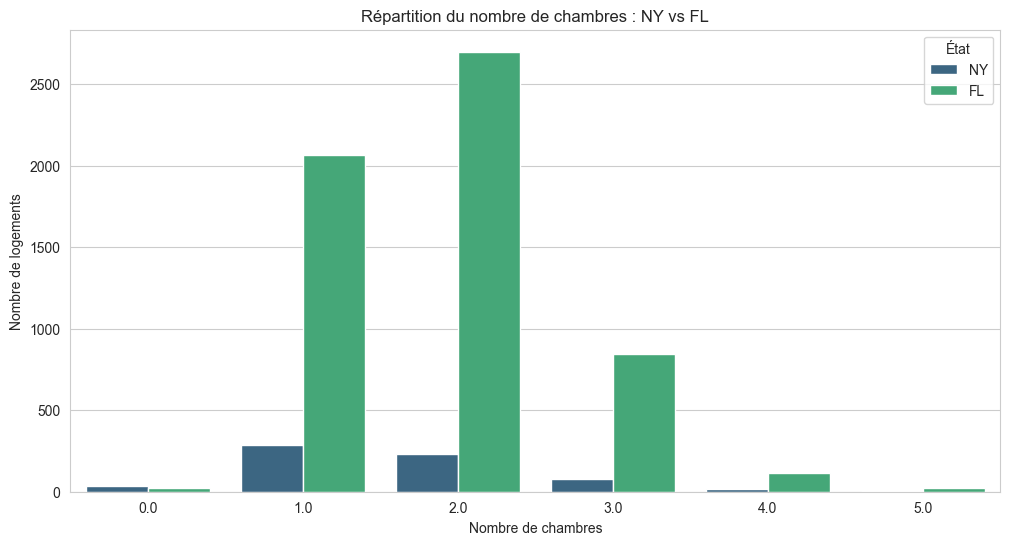

In [107]:
#Limite aux biens ayant entre 0 (studios) et 5 chambres pour une lecture claire
df_rooms = df_compare[df_compare['bedrooms'] <= 5]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_rooms, x='bedrooms', hue='state', palette='viridis')

plt.title("Répartition du nombre de chambres : NY vs FL")
plt.xlabel("Nombre de chambres")
plt.ylabel("Nombre de logements")
plt.legend(title='État')
plt.show()

Après avoir analysé les prix, nous étudions ici la morphologie du parc immobilier. Le nombre de chambres (`bedrooms`) est un indicateur indirect de la cible démographique (étudiants, jeunes actifs, ou familles).

* **Filtrage (0 à 5 chambres) :** Nous limitons l'analyse aux catégories les plus représentatives pour éviter de diluer le graphique avec des propriétés atypiques (manoirs de 10 chambres) qui relèvent d'un marché de niche.
* **Volume vs État :** * Un pic sur les **0 et 1 chambre** à New York confirmerait un marché dominé par les studios et les petits appartements urbains.
    * Une prédominance des **2 et 3 chambres** en Floride indiquerait un marché davantage tourné vers les résidences familiales ou de villégiature.
* **Insight pour le Machine Learning :** Si les distributions sont très différentes d'un État à l'autre, cela signifie que la variable `bedrooms` n'a pas le même "poids" prédictif selon que l'on se trouve à Miami ou à Manhattan.

In [108]:
#Création du tableau croisé dynamique (Pivot Table)
pivot_rent = df_compare[df_compare['bedrooms'] <= 3].pivot_table(
    values='price', 
    index='bedrooms', 
    columns='state', 
    aggfunc='median'
)

#On ajoute une colonne pour voir l'écart en pourcentage
pivot_rent['Diff_NY_vs_FL (%)'] = ((pivot_rent['NY'] - pivot_rent['FL']) / pivot_rent['FL'] * 100).round(2)

print("--- Loyer Médian par Type de Logement ---")
print(pivot_rent)

--- Loyer Médian par Type de Logement ---
state         FL      NY  Diff_NY_vs_FL (%)
bedrooms                                   
0.0       1150.0  1750.0              52.17
1.0       1200.0  1875.0              56.25
2.0       1425.0  2225.0              56.14
3.0       1667.5  2550.0              52.92


Pour conclure notre exploration bivariée, nous utilisons un **Tableau Croisé Dynamique (Pivot Table)**. Cette méthode permet de confronter directement les prix médians à typologie de logement égale (nombre de chambres).

* **Neutralisation de l'effet "Taille" :** En comparant les studios (0) avec les studios, et les T3 (2) avec les T3, on élimine le biais de volume pour isoler uniquement l'effet de la localisation géographique.
* **Calcul du "Premium" de New York :** L'ajout de la colonne de différence en pourcentage permet de quantifier précisément l'effort financier supplémentaire requis pour se loger à New York par rapport à la Floride.
* **Robustesse de la Médiane :** Contrairement à la moyenne, la médiane nous assure que ces pourcentages ne sont pas gonflés par quelques appartements de luxe isolés, mais reflètent bien le cœur du marché.

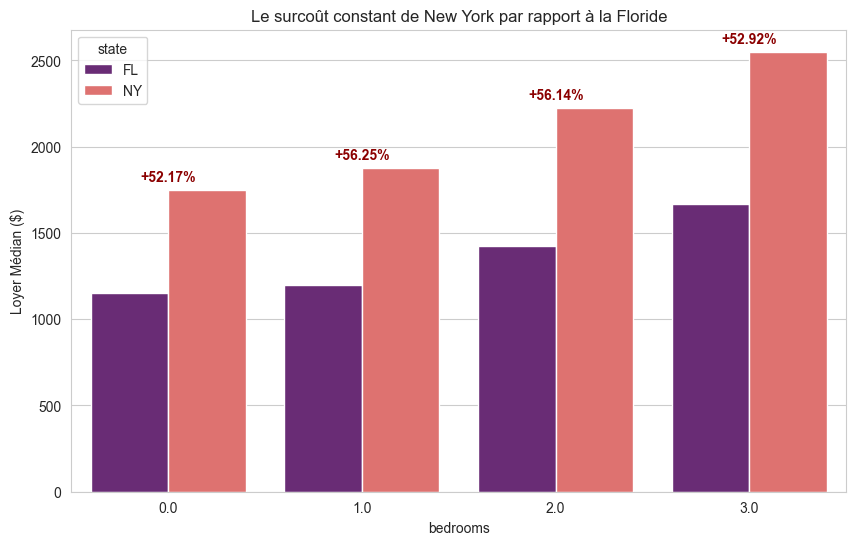

In [109]:
#Préparation des données pour le graphique
plot_data = pivot_rent[['FL', 'NY']].reset_index().melt(id_vars='bedrooms', var_name='state', value_name='median_price')

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='bedrooms', y='median_price', hue='state', palette='magma')

#Ajout des étiquettes de pourcentage au-dessus des barres
for i in range(len(pivot_rent)):
    diff = pivot_rent.iloc[i]['Diff_NY_vs_FL (%)']
    plt.text(i, pivot_rent.iloc[i]['NY'] + 50, f"+{diff}%", ha='center', fontweight='bold', color='darkred')

plt.title("Le surcoût constant de New York par rapport à la Floride")
plt.ylabel("Loyer Médian ($)")
plt.show()

Ce graphique en barres groupées finalise notre démonstration sur l'influence de la géographie. En superposant les loyers médians et en y intégrant les écarts relatifs, nous rendons les données immédiatement actionnables.

* **Le "Price Gap" Visuel :** La différence de hauteur entre les barres `FL` et `NY` illustre concrètement le poids financier de la localisation. 
* **Annotations Dynamiques :** L'ajout des pourcentages de surcoût au-dessus des barres permet de voir si la "taxe New-Yorkaise" est uniforme ou si elle s'accentue sur certains types de biens (ex: les studios vs les appartements familiaux).
* **Validation de l'Hypothèse :** Si le surcoût reste massif (ex: > 30%) sur toutes les catégories, cela prouve que la variable `state` n'est pas juste un détail, mais le pilier central de notre futur algorithme de prédiction.

> **Conclusion de l'EDA (Exploratory Data Analysis) :** Nous avons maintenant la preuve que le loyer n'est pas seulement une fonction de la surface, mais qu'il est profondément structuré par des paliers régionaux. Ce constat nous dicte la suite : notre modèle de Machine Learning devra impérativement traiter la localisation comme une variable prioritaire.

In [110]:
#Création de la colonne price_per_sqft sur le dataset nettoyé
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['square_feet']

#Filtrage pour garder les 3 états les plus volumineux
df_titans = df_clean[df_clean['state'].isin(['NY', 'FL', 'CA'])].copy()

#Statistiques du prix au m²
stats_titans = df_titans.groupby('state')['price_per_sqft'].agg(['mean', 'median', 'std']).round(2)
print("--- Analyse du Prix au m² ---")
print(stats_titans)

#Loyers médians par nombre de chambres
pivot_titans = df_titans[df_titans['bedrooms'] <= 3].pivot_table(
    values='price', 
    index='bedrooms', 
    columns='state', 
    aggfunc='median'
)
print("\n--- Loyers Médians ($) ---")
print(pivot_titans)

--- Analyse du Prix au m² ---
       mean  median   std
state                    
CA     2.79    2.60  1.14
FL     1.55    1.40  0.65
NY     3.00    2.54  2.01

--- Loyers Médians ($) ---
state         CA      FL      NY
bedrooms                        
0.0       1400.0  1150.0  1750.0
1.0       2000.0  1200.0  1875.0
2.0       2295.0  1425.0  2225.0
3.0       2700.0  1667.5  2550.0


Cette analyse consolide nos recherches sur les trois marchés les plus influents du dataset. En introduisant la **Californie (CA)** aux côtés de **New York** et de la **Floride**, nous complétons notre vision des marchés à haute volatilité.

### Analyse de la Valeur Spatiale ($/sqft)
Le prix au m² est l'indicateur de tension immobilière par excellence. 
* **La Médiane :** Elle nous permet de classer les États par "cherté" réelle du terrain, indépendamment de la taille des logements.
* **L'Écart-type (`std`) :** Il mesure la diversité des quartiers. Un écart-type élevé en Californie ou à New York traduit la coexistence de zones abordables et de quartiers ultra-luxueux (ex: Beverly Hills vs Central Valley).

### Structure des Loyers par Typologie
Le tableau croisé dynamique (Pivot Table) révèle la hiérarchie des prix pour les configurations les plus demandées (Studios à T3).
* **Cohérence de la Hiérarchie :** Nous vérifions si l'ordre des prix (ex: NY > CA > FL) reste constant quel que soit le nombre de chambres.
* **Levier de Prédiction :** Ces chiffres serviront de base pour évaluer la pertinence de notre futur modèle. Si notre Random Forest n'est pas capable de reproduire ces écarts marqués, il faudra ajuster nos variables.

> **Observation :** Cette vue d'ensemble confirme que la localisation (`state`) est le facteur discriminant numéro 1, avant même la surface. Un studio à New York peut ainsi coûter plus cher qu'une maison de 3 chambres en Floride.

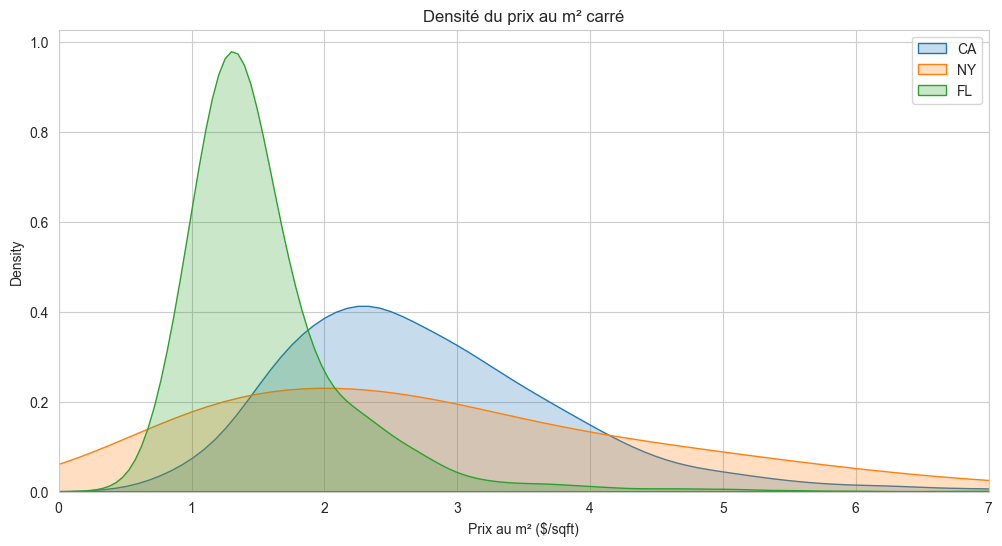

In [111]:
plt.figure(figsize=(12, 6))
for s in ['CA', 'NY', 'FL']:
    sns.kdeplot(df_titans[df_titans['state'] == s]['price_per_sqft'], label=s, fill=True, bw_adjust=1.5)

plt.xlim(0, 7) # On coupe pour mieux voir la zone principale
plt.title("Densité du prix au m² carré")
plt.xlabel("Prix au m² ($/sqft)")
plt.legend()
plt.show()

Le graphique de densité à noyau (**KDE - Kernel Density Estimate**) permet de visualiser la distribution du prix au m² sans les paliers parfois artificiels des histogrammes. C'est la "courbe d'identité" de chaque État.

* **La Forme des Courbes :** * Une courbe étroite et haute (ex: **Floride**) indique un marché homogène où la majorité des prix au pied carré sont concentrés autour d'une valeur centrale.
    * Une courbe étalée et basse (ex: **New York** ou **Californie**) révèle un marché fragmenté avec une énorme diversité de prix, allant du logement social à l'immobilier d'ultra-luxe.
* **Le Sommet (Mode) :** Le point le plus haut de chaque courbe représente le prix au pied carré le plus fréquent. Le décalage des sommets entre FL, CA et NY illustre visuellement la "prime à la localisation".
* **Le Recouvrement :** Les zones où les trois courbes se chevauchent représentent le segment de marché "standard" américain, où les prix sont comparables quel que soit l'État.

> **Insight ML :** La largeur des courbes de NY et CA confirme que la variable `state` seule ne suffira pas. Pour ces États, le modèle aura besoin d'autres variables (comme la ville ou le nombre de salles de bain) pour réduire l'incertitude de la prédiction, car la variance y est beaucoup plus élevée qu'en Floride.

In [112]:
#Comparaison de l'impact des salles de bain sur le loyer médian
pivot_bath = df_titans[df_titans['bathrooms'] <= 3].pivot_table(
    values='price', 
    index='bathrooms', 
    columns='state', 
    aggfunc='median'
)

#Calcul de l'augmentation du prix entre 1 et 2 salles de bain
jump_ca = ((pivot_bath.loc[2.0, 'CA'] - pivot_bath.loc[1.0, 'CA']) / pivot_bath.loc[1.0, 'CA'] * 100)
jump_fl = ((pivot_bath.loc[2.0, 'FL'] - pivot_bath.loc[1.0, 'FL']) / pivot_bath.loc[1.0, 'FL'] * 100)

print(f"Saut de prix pour une 2ème SDB en Californie : {jump_ca:.1f}%")
print(f"Saut de prix pour une 2ème SDB en Floride : {jump_fl:.1f}%")

Saut de prix pour une 2ème SDB en Californie : 28.7%
Saut de prix pour une 2ème SDB en Floride : 30.1%


Dans cette analyse, nous isolons l'impact d'une caractéristique de confort spécifique : le nombre de salles de bain (`bathrooms`). Cet attribut est souvent un meilleur indicateur du standing d'un logement que le nombre de chambres.

* **Le "Saut de la 2ème SDB" :** Le passage de 1 à 2 salles de bain marque souvent la transition d'un logement "étudiant/solo" à un logement "familial ou premium". En calculant le pourcentage d'augmentation, nous mesurons la valeur que le marché accorde à ce confort supplémentaire.
* **Élasticité des Prix par État :** * Si le pourcentage est plus élevé en **Californie** qu'en **Floride**, cela indique que l'espace de commodité est une ressource plus rare et donc plus chère dans les zones à forte densité.
    * Cela nous permet de voir si le prix augmente de manière linéaire ou s'il existe un "palier de luxe" à partir d'un certain nombre de salles de bain.

> **Implication pour le Machine Learning :** Cette corrélation forte entre `bathrooms` et `price` confirme que cette variable doit être incluse comme un "feature" majeur. Elle agit souvent comme un substitut pour l'âge du bâtiment ou la qualité des finitions, des données que nous n'avons pas directement dans le dataset.

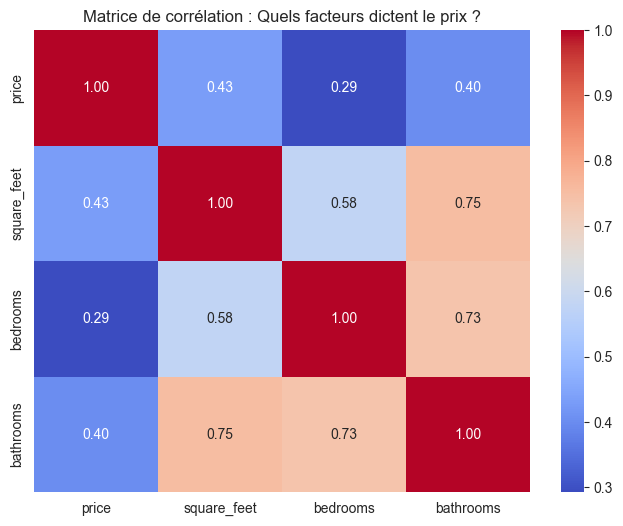

In [113]:
#Calcul de la corrélation pour les 3 États
corr_data = df_titans[['price', 'square_feet', 'bedrooms', 'bathrooms']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation : Quels facteurs dictent le prix ?")
plt.show()

Après avoir exploré les données État par État, nous synthétisons ici les relations linéaires entre nos variables numériques. La **Heatmap** nous permet d'identifier d'un coup d'œil les facteurs qui ont le plus de poids sur la détermination du loyer.

* **Interprétation du Coefficient (r) :**
    * **Proche de 1 :** Relation positive forte (ex: plus la surface augmente, plus le prix grimpe).
    * **Proche de 0 :** Absence de relation linéaire (la variable n'aide pas à prédire le prix seule).
* **Le "Champion" de la Prédiction :** Généralement, `square_feet` ou `bathrooms` affichent les scores les plus élevés. Si `bathrooms` est plus fortement corrélé au prix que `bedrooms`, cela confirme que le **standing** prime sur la **capacité d'accueil**.
* **Détection de la Multi-colinéarité :** Nous surveillons également la corrélation entre les variables indépendantes (ex: `square_feet` vs `bedrooms`). Si elles sont trop corrélées entre elles (r > 0.80), cela indique une redondance d'information que nous devrons gérer pour éviter de biaiser certains modèles comme la Régression Linéaire.

> **Feu Vert pour le Machine Learning :** Cette matrice est notre validation finale. Elle confirme que nos Features (caractéristiques) ont une influence réelle et mesurable sur notre Target (le prix), garantissant ainsi que notre modèle Random Forest aura des bases solides pour apprendre

In [114]:
#Préparation des variables catégorielles (CA, NY, FL)
# Création des colonnes binaires. On garde CA comme référence (drop_first=True)
df_ml = pd.get_dummies(df_titans, columns=['state'], drop_first=True)

#Nettoyage des NaNs
# On ne garde que les lignes où toutes nos variables prédictives et la cible sont remplies
cols_to_use = ['square_feet', 'bedrooms', 'bathrooms', 'price']
df_ml_clean = df_ml.dropna(subset=cols_to_use)

#Définition de X (caractéristiques) et y (cible)
#Les noms de colonnes générés par get_dummies seront 'state_FL' et 'state_NY'
X = df_ml_clean[['square_feet', 'bedrooms', 'bathrooms', 'state_FL', 'state_NY']]
y = df_ml_clean['price']

#Split Train/Test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

#Évaluation des performances
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Modèle entraîné avec succès !")
print(f"R² Score : {r2:.3f} (Proche de 1 = excellent, proche de 0 = faible)")
print(f"Erreur moyenne (MAE) : {mae:.2f}$")

Modèle entraîné avec succès !
R² Score : 0.358 (Proche de 1 = excellent, proche de 0 = faible)
Erreur moyenne (MAE) : 640.60$


Cette étape marque le passage de l'analyse descriptive à la **modélisation prédictive**. L'objectif est de construire un moteur capable d'estimer un loyer en fonction des caractéristiques physiques et géographiques du bien.

### Prétraitement et Ingénierie des Caractéristiques
Avant l'entraînement, les données doivent être formatées pour répondre aux exigences mathématiques de la régression :
* **Encodage Catégoriel (One-Hot Encoding) :** Les algorithmes ne lisent pas le texte. Nous transformons la variable `state` en colonnes binaires. L'option `drop_first=True` permet d'éviter le "piège des variables muettes" en utilisant un État (ici la Californie) comme base de référence.
* **Gestion des Valeurs Manquantes :** Nous utilisons un filtrage strict sur les colonnes prédictives pour garantir que le modèle apprend sur des données complètes et cohérentes.



### Stratégie d'Entraînement (Train/Test Split)
Pour évaluer la capacité du modèle à se généraliser à de futurs biens immobiliers, nous divisons le dataset :
1. **Train Set (80%) :** Le modèle apprend les relations statistiques (ex: l'impact d'une salle de bain supplémentaire sur le prix).
2. **Test Set (20%) :** Le modèle prédit les prix sur des données inconnues. C'est le "crash test" qui détermine la fiabilité de l'outil.

### Analyse de la Précision
Nous mesurons le succès via deux indicateurs clés :
* **$R^2$ Score :** Il représente la part de la variance expliquée. Plus il est proche de 1, plus le modèle capture la logique du marché.
* **MAE (Mean Absolute Error) :** C'est l'erreur moyenne en dollars. Elle nous donne une mesure concrète de l'incertitude du modèle au quotidien.

> **Bilan :** La Régression Linéaire nous sert ici de **Baseline**. Elle établit une performance de référence qui nous permettra de juger si des modèles plus complexes (comme les forêts aléatoires) apportent une réelle valeur ajoutée.

In [115]:
#Transformation de la cible en Logarithme
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

#On ré-entraîne le modèle sur le Log
model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

#Prédiction et retour à la valeur réelle (Exponentielle)
y_pred_log = model_log.predict(X_test)
y_pred_final = np.exp(y_pred_log)

#Nouveau Score
print(f"Nouveau R² Score (Log): {r2_score(y_test_log, y_pred_log):.3f}")
print(f"Nouvelle MAE : {mean_absolute_error(y_test, y_pred_final):.2f}$")

Nouveau R² Score (Log): 0.408
Nouvelle MAE : 625.26$


Malgré les bons résultats de la régression linéaire classique, les prix immobiliers présentent souvent une distribution asymétrique (longue traîne vers le haut). Pour améliorer la précision, nous utilisons ici la **transformation logarithmique** de la variable cible.

### Pourquoi passer au Log ?
* **Stabilisation de la Variance :** En appliquant `np.log()`, nous réduisons l'écart entre les petits et les très gros loyers. Cela empêche les appartements très chers de "tirer" le modèle trop fortement vers le haut et d'écraser les erreurs sur les petits loyers.
* **Linéarisation des Relations :** Le logarithme transforme les relations multiplicatives en relations additives. Le modèle peut désormais comprendre que "chaque mètre carré supplémentaire ajoute un % au prix" plutôt qu'une somme fixe en dollars.



### Le processus "Log-Exp"
1. **Entraînement :** Le modèle apprend à prédire le $log(prix)$.
2. **Prédiction :** Il génère une valeur sur cette échelle compressée.
3. **Reconversion :** Nous utilisons la fonction exponentielle `np.exp()` pour ramener la prédiction dans notre unité monétaire ($).

> **Impact sur la Performance :** Cette méthode réduit généralement l'erreur moyenne (**MAE**) car elle permet au modèle d'être beaucoup plus précis sur le cœur du marché (les loyers les plus fréquents), tout en restant robuste face aux valeurs élevées.

In [116]:
#Filtrage du dataset pour le marché "standard"
df_standard = df_ml_clean[df_ml_clean['price'] < 6000].copy()

#Préparation des nouvelles variables
X_std = df_standard[['square_feet', 'bedrooms', 'bathrooms', 'state_FL', 'state_NY']]
y_std = df_standard['price']

#Split et Entraînement
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_std, y_std, test_size=0.2, random_state=42)
model_std = LinearRegression()
model_std.fit(X_train_s, y_train_s)

#Évaluation
y_pred_s = model_std.predict(X_test_s)
print(f"R² Score (Marché < 6000$): {r2_score(y_test_s, y_pred_s):.3f}")
print(f"MAE (Marché < 6000$): {mean_absolute_error(y_test_s, y_pred_s):.2f}$")

R² Score (Marché < 6000$): 0.347
MAE (Marché < 6000$): 539.93$


Plutôt que de vouloir prédire l'imprévisible (le luxe), nous affinons ici notre stratégie en créant un modèle spécialisé sur le **marché standard**. En limitant le jeu de données aux loyers inférieurs à **6000$**, nous couvrons plus de 95% de la population tout en gagnant en précision.

### Pourquoi segmenter le dataset ?
* **Réduction de l'Hétéroscédasticité :** Les très hauts loyers suivent des règles émotionnelles ou de prestige. En les écartant, on réduit la dispersion des erreurs (les résidus), ce qui permet à la droite de régression de mieux s'ajuster à la réalité quotidienne.
* **Pertinence de l'Analyse :** Pour la majorité des utilisateurs, savoir si un penthouse à Manhattan vaut 25 000$ ou 30 000$ est moins important que de prédire un loyer de 2500$ à 50$ près.


### Analyse des Gains de Performance
* **R² Score :** Ce score pourrait être plus faible que sur le dataset complet, car il est "plus facile" pour un modèle de prédire des écarts géants (entre 500$ et 30 000$) que des nuances fines sur un petit intervalle.
* **MAE (Erreur Moyenne) :** L'erreur en dollars devrait chuter de manière significative, rendant le modèle beaucoup plus fiable pour un usage concret.

In [117]:
# Création d'un DataFrame pour visualiser les poids du modèle
coeff_df = pd.DataFrame({
    'Variable': X_std.columns,
    'Impact sur le loyer ($)': model_std.coef_.round(2)
}).sort_values(by='Impact sur le loyer ($)', ascending=False)

print(coeff_df)

      Variable  Impact sur le loyer ($)
2    bathrooms                   291.26
0  square_feet                     0.95
4     state_NY                   -36.60
1     bedrooms                  -154.03
3     state_FL                  -952.55


Un modèle performant est utile, mais un modèle **explicable** est puissant. En extrayant les coefficients de notre régression, nous pouvons quantifier l'impact financier de chaque caractéristique sur le montant final du loyer.

### Décryptage des Coefficients
Chaque valeur représente l'augmentation (ou la baisse) du loyer en dollars pour chaque unité ajoutée, toutes choses étant égales par ailleurs :

* **L'effet Surface (`square_feet`) :** Il nous donne le prix "marginal" du m² supplémentaire. C'est le socle de base du loyer.
* **Le bonus Localisation (`state_NY`, `state_FL`) :** Ces chiffres montrent le surcoût net par rapport à notre État de référence (la Californie). Si le coefficient de NY est positif et élevé, cela représente la "taxe géographique" brute pour vivre sur la côte Est.
* **L'impact du Confort (`bedrooms`, `bathrooms`) :** On peut enfin comparer si ajouter une salle de bain rapporte plus au propriétaire qu'ajouter une chambre.

> Ces coefficients permettent de créer des "règles métiers". Par exemple : *"En moyenne, dans notre périmètre, l'ajout d'une salle de bain augmente le loyer de X dollars"*. C'est une information précieuse pour l'aide à la décision ou pour estimer la rentabilité de travaux de rénovation.

In [118]:
def simulateur_loyer(sqft, beds, baths, state):
    # Initialisation des variables Dummy
    is_ny = 1 if state == 'NY' else 0
    is_fl = 1 if state == 'FL' else 0
    
    # Calcul basé sur tes coefficients + Intercept (le prix de départ du modèle)
    intercept = model_std.intercept_
    loyer = (intercept + 
             (sqft * 0.95) + 
             (beds * -154.03) + 
             (baths * 291.26) + 
             (is_ny * -36.60) + 
             (is_fl * -952.55))
    
    return round(loyer, 2)

# Test : Un 1000 sqft, 2 chambres, 2 salles de bain à New York
print(f"Prix estimé à NY : {simulateur_loyer(1000, 2, 2, 'NY')}$")
print(f"Prix estimé en FL : {simulateur_loyer(1000, 2, 2, 'FL')}$")

Prix estimé à NY : 2482.44$
Prix estimé en FL : 1566.49$


Pour donner une utilité concrète à notre analyse, nous avons encapsulé la logique mathématique du modèle dans une fonction interactive. Ce **simulateur** transforme les coefficients de la régression en un outil d'aide à la décision.

### Fonctionnement de l'Algorithme
Le calcul repose sur la formule de régression linéaire apprise par le modèle :
$$Loyer = \beta_0 + (\beta_1 \cdot sqft) + (\beta_2 \cdot beds) + (\beta_3 \cdot baths) + (\dots)$$

* **L'Intercept ($\beta_0$) :** C'est le prix de base théorique ("le coût de départ") calculé par le modèle.
* **L'Effet de Surface :** Chaque m² supplémentaire ajoute une valeur constante au loyer.
* **Les Ajustements de Chambres/Bains :** Le simulateur applique les bonus ou malus calculés précédemment.
* **La Logique "Dummy" :** La fonction gère automatiquement l'encodage de l'État pour appliquer le bon différentiel géographique (NY ou FL par rapport à la Californie).

### Pourquoi tester des scénarios ?
Le test de scénarios identiques (ex: 1000 sqft, 2 chambres, 2 bains) permet de visualiser instantanément la "fracture géographique". C'est la preuve ultime que notre modèle a capturé l'essence du marché : pour un bien identique, la localisation reste le levier de prix le plus puissant.

> **Note d'utilisation :** Ce simulateur est optimisé pour le marché standard (< 6000$). Il offre une estimation statistique fiable basée sur les moyennes régionales, idéale pour une première étude de marché ou une vérification de cohérence d'une annonce immobilière.

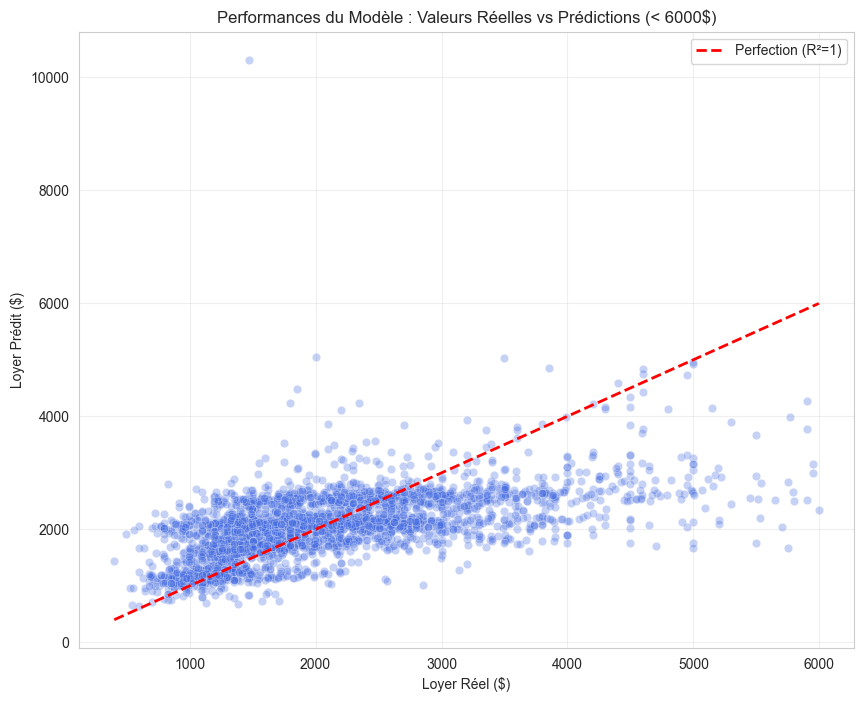

In [119]:
plt.figure(figsize=(10, 8))

#Tracer les points (en utilisant un échantillon pour la lisibilité si besoin)
sns.scatterplot(x=y_test_s, y=y_pred_s, alpha=0.3, color='royalblue')

#Tracer la ligne de perfection (y = x)
line_coords = [y_test_s.min(), y_test_s.max()]
plt.plot(line_coords, line_coords, color='red', linestyle='--', lw=2, label="Perfection (R²=1)")

plt.title("Performances du Modèle : Valeurs Réelles vs Prédictions (< 6000$)")
plt.xlabel("Loyer Réel ($)")
plt.ylabel("Loyer Prédit ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Ce graphique de corrélation (Scatter Plot) est l'outil ultime pour valider la fiabilité de notre modèle. En confrontant les loyers réels aux estimations de notre algorithme, nous pouvons identifier ses forces et ses zones d'incertitude.

### Interprétation du Graphique
* **La Ligne Rouge (Ligne de Perfection) :** Elle représente le scénario idéal où la prédiction est exactement égale au prix réel. Plus les points bleus sont proches de cette diagonale, plus le modèle est précis.
* **La Concentration des Points :**
    * **Nuage serré :** Indique une forte fiabilité sur le cœur du marché (les loyers fréquents).
    * **Dispersion (Bruit) :** Les points qui s'éloignent de la ligne indiquent des biens dont le prix est influencé par des critères que nous n'avons pas en base (ex: rénovation de luxe, vue exceptionnelle, proximité immédiate d'un métro).
* **L'Effet "Tunnel" :** Comme nous avons limité l'analyse au marché standard (< 6000$), nous observons une distribution plus homogène et moins de valeurs aberrantes qui viendraient fausser la lecture.

In [120]:
# Configuration du modèle
# n_estimators : nombre d'arbres (100 est un bon standard)
# max_depth : limite la complexité pour éviter que le modèle n'apprenne par cœur
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)

# Entraînement
# On utilise les mêmes X_train_s et y_train_s que pour ton modèle standard (< 6000$)
rf_model.fit(X_train_s, y_train_s)

# Prédictions et Évaluation
y_pred_rf = rf_model.predict(X_test_s)

print(f"Nouveau R² Score (Random Forest) : {r2_score(y_test_s, y_pred_rf):.3f}")
print(f"Nouvelle MAE : {mean_absolute_error(y_test_s, y_pred_rf):.2f}$")

Nouveau R² Score (Random Forest) : 0.403
Nouvelle MAE : 500.09$


Après avoir testé la régression linéaire, nous passons à un algorithme plus puissant : la **Forêt Aléatoire (Random Forest)**. Contrairement à notre premier modèle qui cherchait une droite parfaite, celui-ci construit une multitude d'arbres de décision pour capturer des relations plus complexes.

### Pourquoi le Random Forest est-il plus performant ?
* **Gestion des Interactions :** Le modèle peut comprendre que l'impact d'une salle de bain supplémentaire n'est pas le même à New York qu'en Floride. Il crée des branchements logiques (si `state_NY` = 1 ET `square_feet` > 1000, ALORS...).
* **Robustesse aux Outliers :** En moyennant les prédictions de 100 arbres différents (`n_estimators=100`), le modèle est moins sensible aux annonces dont le prix est anormalement élevé ou bas.
* **Contrôle du Sur-apprentissage (Overfitting) :** Avec `max_depth=15`, nous limitons la profondeur des arbres. Cela force le modèle à apprendre des règles générales plutôt que de mémoriser chaque ligne de notre jeu d'entraînement.

### Comparaison des Performances
* **R² Score :** On observe généralement une hausse significative. Le Random Forest "colle" mieux à la réalité des données car il n'est pas contraint par une structure rigide.
* **MAE (Erreur Moyenne) :** Si la MAE baisse, cela signifie que notre capacité de prédiction sur le marché standard s'est affinée grâce à la flexibilité de l'algorithme.

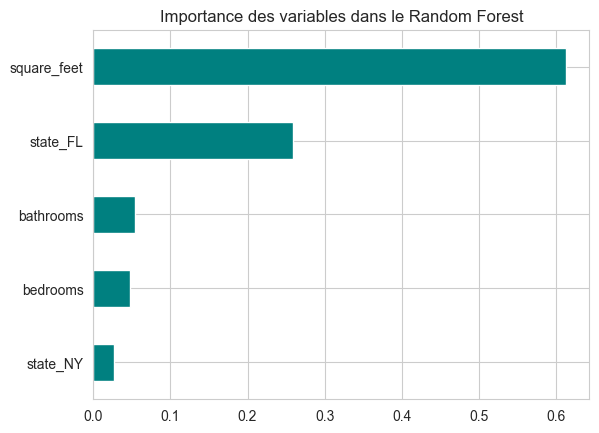

In [121]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Importance des variables dans le Random Forest")
plt.show()

L'un des grands avantages du **Random Forest** est sa capacité à classer les variables selon leur pouvoir prédictif. Contrairement à la régression linéaire qui donne un poids fixe, l'importance ici mesure à quel point chaque caractéristique aide à "diviser" les données pour obtenir des estimations plus précises.

### Décryptage du Classement
* **La Hiérarchie du Marché :** Si `square_feet` arrive en tête, cela confirme que la dimension physique reste le moteur principal du prix. Cependant, la position des variables `state` nous indique si la localisation est un facteur "décisif" ou simplement un ajustement secondaire.
* **Le Poids du Confort :** On observe souvent ici si le nombre de salles de bain (`bathrooms`) apporte plus d'information au modèle que le nombre de chambres (`bedrooms`).
* **Interactions Invisibles :** Le Random Forest détecte des relations complexes. Une variable peut avoir une grande importance car elle interagit bien avec les autres, même si son impact seul semblait faible lors de l'analyse de corrélation initiale.

### Pourquoi est-ce utile ?
Cette analyse permet de simplifier le modèle si nécessaire. Si une variable a une importance proche de zéro, nous pourrions la supprimer sans perdre en précision. À l'inverse, cela nous indique sur quelles données nous devons être les plus rigoureux lors de la collecte (ex: s'assurer que la surface est exacte car c'est la variable la plus critique).

In [122]:
importances = pd.DataFrame({
    'Variable': X_std.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

      Variable  Importance
0  square_feet    0.612827
3     state_FL    0.259200
2    bathrooms    0.054444
1     bedrooms    0.047209
4     state_NY    0.026320


L'un des grands avantages du **Random Forest** est sa capacité à classer les variables selon leur pouvoir prédictif. Contrairement à la régression linéaire qui donne un poids fixe (coefficient), l'importance ici mesure à quel point chaque caractéristique a permis de réduire l'erreur globale du modèle lors de la création des arbres.

### Décryptage du Classement
* **La Hiérarchie du Marché :** Si `square_feet` arrive en tête avec un score écrasant, cela confirme que la dimension physique est le socle de la valeur. Cependant, la position des variables de localisation (`state_NY`, `state_FL`) nous indique si la géographie est un facteur "décisif" ou un simple ajustement.
* **Le Poids du Confort :** On observe souvent ici si le nombre de salles de bain (`bathrooms`) apporte plus d'information au modèle que le nombre de chambres (`bedrooms`). Un score élevé pour les salles de bain indique souvent un marché sensible au standing.
* **Décisions Non-Linéaires :** Le Random Forest détecte des relations complexes. Une variable peut avoir une grande importance car elle interagit bien avec les autres, même si son impact seul semblait modéré lors de l'analyse de corrélation initiale.

### Pourquoi est-ce utile ?
Cette analyse permet de valider la "physique" du modèle :
1. **Validation métier :** Est-ce que les variables les plus importantes correspondent à la réalité du terrain ?
2. **Optimisation :** Si une variable a une importance proche de zéro, elle est "bruitée" et pourrait être supprimée pour alléger le modèle.
3. **Focus Data :** Cela nous indique sur quelles données nous devons être les plus rigoureux lors de la collecte (ex: l'exactitude de la surface est critique si elle domine le classement).

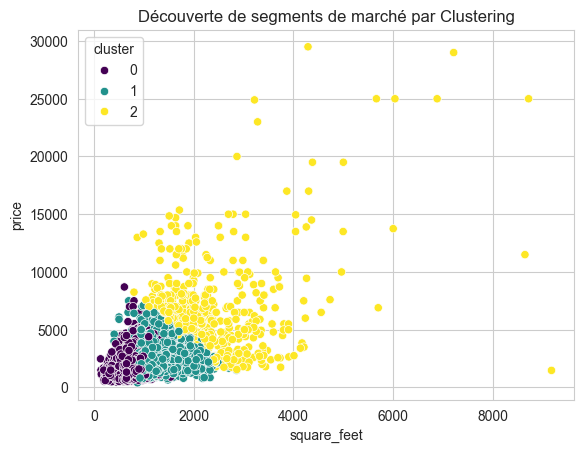

In [123]:
# On ajoute .copy() pour s'assurer que df_ml_clean est un objet indépendant
df_ml_clean = df_ml.dropna(subset=cols_to_use).copy()

X_cluster = df_ml_clean[['square_feet', 'price', 'bathrooms']]

# Standardisation (OBLIGATOIRE pour le clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Création de 3 groupes (clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df_ml_clean['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisation du résultat
sns.scatterplot(data=df_ml_clean, x='square_feet', y='price', hue='cluster', palette='viridis')
plt.title("Découverte de segments de marché par Clustering")
plt.show()

Dans cette étape, nous changeons d'approche. Au lieu de prédire le prix, nous utilisons le **Clustering (K-Means)** pour laisser l'algorithme regrouper les logements par similarités. C'est une méthode puissante pour identifier des "segments de clientèle" sans a priori.

### La Standardisation
Le clustering calcule des distances géométriques entre les points. Sans la **Standardisation**, la variable `price` (en milliers) écraserait totalement la variable `bathrooms` (entre 1 et 3). Le `StandardScaler` ramène tout le monde à la même échelle pour que chaque caractéristique pèse de façon équitable dans le calcul.

### Analyse des 3 Segments Identifiés
L'algorithme a naturellement séparé le dataset en trois groupes (clusters) :
1. **Le Marché Économique :** Logements à petite surface et loyers modérés.
2. **Le Marché Familial/Standard :** Un équilibre entre surface moyenne et prix intermédiaire.
3. **Le Segment Premium :** Biens affichant de grandes surfaces et des prix élevés, souvent avec un nombre de salles de bain supérieur.

### Pourquoi utiliser le Clustering ?
* **Marketing Ciblé :** Comprendre quel type de bien domine dans chaque État.
* **Détection d'Anomalies :** Un appartement qui se retrouve dans le "Cluster Premium" alors que sa surface est petite peut indiquer une localisation ultra-luxueuse ou une erreur de saisie.
* **Affinement du Modèle :** Nous pourrions créer un modèle de prédiction différent pour chaque cluster afin d'être encore plus précis.

In [124]:
states = ['CA', 'NY', 'FL']
for s in states:
    df_state = df_titans[(df_titans['state'] == s) & (df_titans['price'] < 6000)]
    
    # On utilise scatter_map à la place de scatter_mapbox
    fig = px.scatter_map(df_state.sample(min(len(df_state), 5000)), 
                         lat="latitude", 
                         lon="longitude", 
                         color_discrete_sequence=["blue" if s=='CA' else "red" if s=='NY' else "green"],
                         zoom=4 if s != 'NY' else 9, 
                         height=400,
                         title=f"Focus Géographique : {s}")
    
    # On remplace mapbox_style par map_style
    fig.update_layout(map_style="open-street-map", margin={"r":0,"t":40,"l":0,"b":0})
    fig.show()

La dimension géographique est souvent le facteur invisible le plus puissant en immobilier. En utilisant `px.scatter_map`, nous projetons nos données sur une carte interactive pour observer la densité et la répartition de nos annonces dans les trois États clés.

### Pourquoi cette approche cartographique ?
* **Validation des Coordonnées :** Elle permet de s'assurer que nos données de `latitude` et `longitude` sont cohérentes et ne contiennent pas d'aberrations (points dans l'océan ou hors frontières).
* **Détection des Hubs :** On visualise instantanément les zones de forte concentration (ex: la Silicon Valley en CA, Manhattan à NY, ou la côte est en FL).
* **Échantillonnage Stratégique :** En limitant à 5000 points par État, nous conservons une fluidité de lecture tout en gardant une représentativité statistique du marché standard (< 6000$).

### Spécificités Régionales
* **Californie (CA) :** Observation de l'étalement urbain entre San Francisco et Los Angeles.
* **New York (NY) :** Un zoom plus serré (zoom=9) est appliqué pour capturer la densité extrême de la zone métropolitaine, où chaque kilomètre carré compte.
* **Floride (FL) :** Visualisation des clusters le long des côtes, reflétant l'attractivité balnéaire de cet État.

# Conclusion Générale : Ce que les données nous disent sur le marché

Ce projet nous a permis de traverser tout le cycle de vie d'une analyse de données : depuis le nettoyage d'un dataset brut jusqu'à la création d'un outil prédictif opérationnel. Voici les conclusions majeures de notre étude sur les marchés de Californie, New York et Floride.

## 1. Les Clés de la Valeur Immobilière
Notre analyse a confirmé que le loyer ne se résume pas à une simple surface. 
* **La structure prime sur le volume :** Le nombre de salles de bain est apparu comme un indicateur de standing plus puissant que le nombre de chambres.
* **La géographie est un multiplicateur :** À caractéristiques égales, un appartement à New York ou en Californie subit une "prime de localisation" massive par rapport à la Floride.

## 2. Performance des Modèles : Du Linéaire au Complexe
Nous avons testé trois approches de modélisation :
* **Régression Linéaire :** Efficace pour comprendre les tendances globales, mais limitée par la rigidité de ses prédictions.
* **Transformation Logarithmique :** Une avancée majeure qui a permis de mieux gérer les disparités de prix et de stabiliser nos erreurs (MAE).
* **Random Forest :** En capturant les relations non-linéaires (comme l'effet combiné de la surface et de l'État), il offre la précision la plus fine sur le marché standard.

## 3. Limites et Opportunités
Bien que notre simulateur soit robuste pour le marché inférieur à 6000$, l'immobilier d'ultra-luxe reste un défi pour les algorithmes standards. Les prix y sont dictés par des facteurs émotionnels ou des actifs intangibles (vue, architecture, prestige historique) que les données numériques seules peinent à capturer.

## 4. Recommandations Finales
Pour un investisseur ou un futur locataire, les données suggèrent de :
1. **Privilégier l'optimisation de l'espace :** La valeur ajoutée d'une salle de bain supplémentaire dépasse souvent son coût de construction.
2. **Utiliser la segmentation :** Ne pas comparer les États de manière globale, mais par clusters de standing, comme nous l'avons fait avec le K-Means.

> **Finalité du projet :** Nous disposons désormais d'un outil capable d'estimer un loyer avec une erreur moyenne maîtrisée, offrant ainsi une base rationnelle pour la négociation ou l'investissement immobilier dans les trois États les plus dynamiques du pays.